# Data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv("Data/heart_disease_uci.csv")
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# Potential problems to explore
#### 1. Does age or gender affect the likelihood of heart disease?

#### 2. Which risk factors are most common in patients with heart disease?

#### 3. What are some of the metric patterns that raise the likelihood of heart disease in patients ?

#### 4. Do men and women with heart disease tend to experience different types of chest pain?

# David Arzumanyan

In [38]:
data.shape

(754, 18)

In [39]:
data.isnull().sum()

id              0
age             0
sex             0
dataset         0
cp              0
trestbps        3
chol            0
fbs            66
restecg         0
thalch          0
exang           0
oldpeak         0
slope           0
ca              0
thal            0
num             0
testbps         0
has_disease     0
dtype: int64

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 754 entries, 0 to 915
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           754 non-null    int64  
 1   age          754 non-null    int64  
 2   sex          754 non-null    object 
 3   dataset      754 non-null    object 
 4   cp           754 non-null    object 
 5   trestbps     751 non-null    float64
 6   chol         754 non-null    float64
 7   fbs          688 non-null    object 
 8   restecg      754 non-null    object 
 9   thalch       754 non-null    float64
 10  exang        754 non-null    object 
 11  oldpeak      754 non-null    float64
 12  slope        754 non-null    object 
 13  ca           754 non-null    float64
 14  thal         754 non-null    object 
 15  num          754 non-null    int64  
 16  testbps      754 non-null    object 
 17  has_disease  754 non-null    int64  
dtypes: float64(5), int64(4), object(9)
memory usage: 111.9+

In [8]:
# Checking for duplicated rows
np.sum(data.duplicated())

np.int64(0)

In [9]:
# Checking inconsistent or invalid Entries
print(pd.unique(data["sex"].values))
print(pd.unique(data["dataset"].values))
print(pd.unique(data["cp"].values))
print(pd.unique(data["restecg"].values))
print(pd.unique(data["exang"].values))
print(pd.unique(data["oldpeak"].values))
print(pd.unique(data["slope"].values))
print(pd.unique(data["ca"].values))
print(pd.unique(data["thal"].values))
print(pd.unique(data["num"].values))

['Male' 'Female']
['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']
['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
['lv hypertrophy' 'normal' 'st-t abnormality' nan]
[False True nan]
[ 2.3  1.5  2.6  3.5  1.4  0.8  3.6  0.6  3.1  0.4  1.3  0.   0.5  1.6
  1.   1.2  0.2  1.8  3.2  2.4  2.   2.5  2.2  2.8  3.   3.4  6.2  4.
  5.6  2.9  0.1  2.1  1.9  4.2  0.9  1.1  3.8  0.7  0.3  4.4  5.   nan
 -1.1 -1.5 -0.1 -2.6 -0.7 -2.  -1.   1.7 -0.8 -0.5 -0.9  3.7]
['downsloping' 'flat' 'upsloping' nan]
[ 0.  3.  2.  1. nan]
['fixed defect' 'normal' 'reversable defect' nan]
[0 2 1 3 4]


In [10]:
print(np.sum(data["restecg"].isna()))
data = data.dropna(subset=["restecg"])

2


In [11]:
print(np.sum(data["exang"].isna()))
data = data.dropna(subset="exang")

55


In [12]:
# There are some oldpeak values that are negative and unusal
# Since it's just 12 of them we will remove them
np.sum(data["oldpeak"] < 0)
data = data.drop(data[data["oldpeak"] < 0].index) 

In [13]:
# Fixing null "Slope" values

# Healty heart during exercies
print(np.sum(data[(data["thalch"] > 125) & (data["exang"] == False) & (data["oldpeak"] == 0.0)]["slope"].isna()))

# Medium ischemia
print(np.sum(data[((data["thalch"] > 115) & (data["thalch"] <= 125)) & 
     ((data["oldpeak"] > 1) & 
      (data["oldpeak"] <= 3.5))]["slope"].isna()))

# Significant ischemia
print(np.sum(data[(data["thalch"] < 120) & (data["exang"] == True) & (data["oldpeak"] > 3.5)]["slope"].isna()))

155
2
0


In [14]:
# Healthy heart slope
data.loc[(data["thalch"] > 125) & 
         (data["exang"] == False) & 
         (data["oldpeak"] == 0.0) & 
         (data["slope"].isna()), 
         "slope"] = "upsloping"

# Medium ischemia slope
data.loc[(data["thalch"] > 115) & 
         (data["thalch"] <= 125) & 
         (data["oldpeak"] > 1) & 
         (data["oldpeak"] <= 3.5) &
         (data["slope"].isna()),
         "slope"] = "flat"

# Significant ischemia slope
data.loc[(data["thalch"] < 120) & 
         (data["exang"] == True) & 
         (data["oldpeak"] > 3.5) &
         (data["slope"].isna()),
         "slope"] = "downsloping"

In [15]:
# Dropping the remaining null slope values
np.sum(data["slope"].isna())
data = data.dropna(subset=["slope"])

In [16]:
# Filling missing "ca" (major vessels observed) values with -1 as a placeholder
# that a data is missing
data["ca"] = data["ca"].fillna(-1)

In [17]:
# "thal" thallium stress test column
data["thal"] = data["thal"].fillna("unknown")

In [18]:
# "fbs" 
'''A fasting blood sugar over 120 mg/dL suggests hyperglycemia, which may indicate Diabetes mellitus, or
Impaired glucose tolerance (pre-diabetes). We will leave null values to indicate not performed tests''' 

'A fasting blood sugar over 120 mg/dL suggests hyperglycemia, which may indicate Diabetes mellitus, or\nImpaired glucose tolerance (pre-diabetes). We will leave null values to indicate not performed tests'

| Cholesterol level (mg/dL) | Classification  | Meaning                       |
| ------------------------- | --------------- | ----------------------------- |
| `< 200`                   | Desirable       | Normal range                  |
| `200–239`                 | Borderline high | Elevated risk                 |
| `≥ 240`                   | High            | Risk factor for heart disease |


In [19]:
# "chol" - filling with -1 to indicate missing values
data["chol"] = data["chol"].fillna(-1)

In [20]:
# Filling trestbps with "unkown"
data["testbps"] = data["trestbps"].fillna("unkown")

In [21]:
# Intentionally left the "fbs" nan values to flag those values as missing
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 754 entries, 0 to 915
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        754 non-null    int64  
 1   age       754 non-null    int64  
 2   sex       754 non-null    object 
 3   dataset   754 non-null    object 
 4   cp        754 non-null    object 
 5   trestbps  751 non-null    float64
 6   chol      754 non-null    float64
 7   fbs       688 non-null    object 
 8   restecg   754 non-null    object 
 9   thalch    754 non-null    float64
 10  exang     754 non-null    object 
 11  oldpeak   754 non-null    float64
 12  slope     754 non-null    object 
 13  ca        754 non-null    float64
 14  thal      754 non-null    object 
 15  num       754 non-null    int64  
 16  testbps   754 non-null    object 
dtypes: float64(5), int64(3), object(9)
memory usage: 106.0+ KB


#### 1. Does age or gender affect the likelihood of heart disease?

In [22]:
# Adding a new column of patients having a heart disease
data["has_disease"] = (data["num"] > 0).astype(int)
data["has_disease"]

0      0
1      1
2      1
3      0
4      0
      ..
910    0
911    1
912    1
914    1
915    1
Name: has_disease, Length: 754, dtype: int64

In [23]:
data["has_disease"].value_counts(normalize=True)

has_disease
1    0.545093
0    0.454907
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Age distribution by Heart Disease')

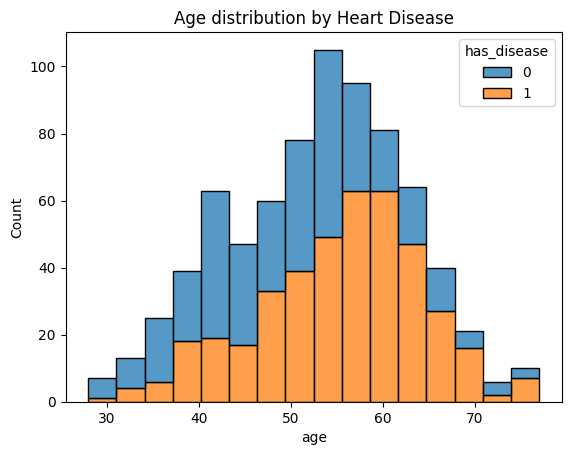

In [24]:
sns.histplot( x='age', hue='has_disease', data=data, multiple='stack')
plt.title("Age distribution by Heart Disease")

Text(0.5, 1.0, 'Male/Female Heart Disease count')

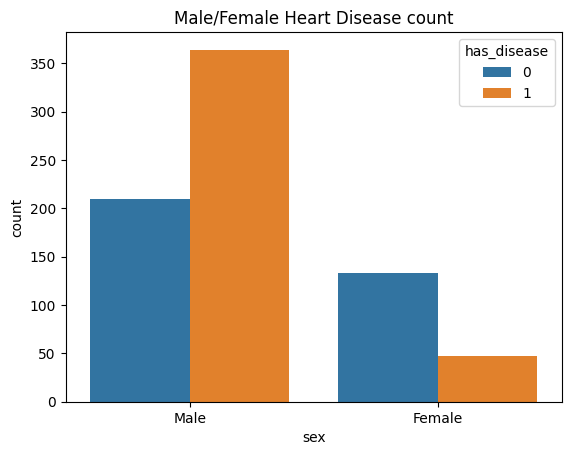

In [25]:
# Male/Female Heart Disease presence count
sns.countplot(x="sex", hue="has_disease", data=data)
plt.title("Male/Female Heart Disease count")

Text(0.5, 1.0, 'Male/Female Heart Disease ratio')

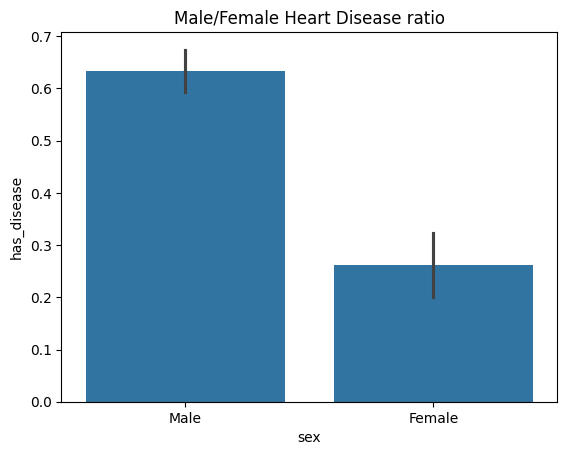

In [26]:
# Male/Female Heart Disease presence ratio
sns.barplot(x="sex", y="has_disease", data=data, estimator=np.mean)
plt.title("Male/Female Heart Disease ratio")

<Axes: xlabel='sex', ylabel='Severity of disease'>

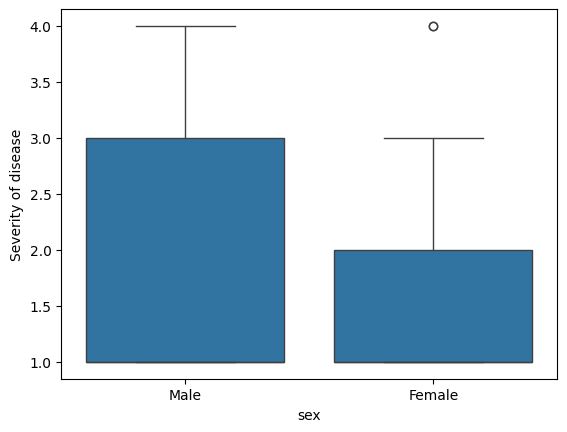

In [27]:
# Severity of heart disease based on gender
has_disease = data[data["num"] > 0]
plt.ylabel("Severity of disease")
sns.boxplot(x="sex", y="num", data=has_disease)

<Axes: xlabel='Severity of disease', ylabel='age'>

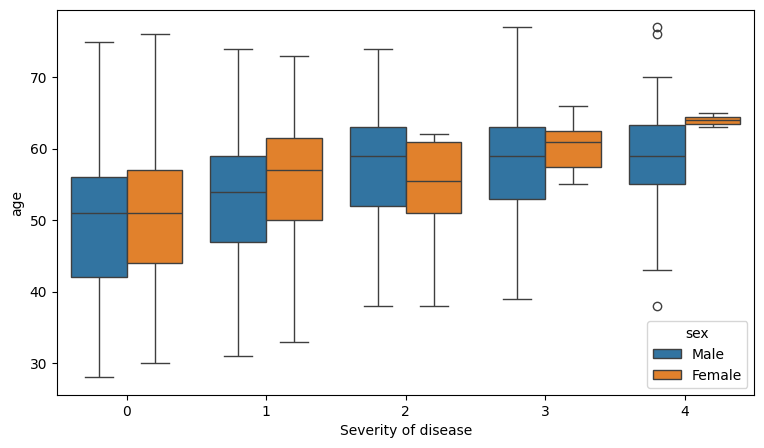

In [28]:
# Heart disease presence and severity based on age and gender
plt.figure(figsize=(9,5))
plt.xlabel("Severity of disease")
sns.boxplot(x="num", y="age", data=data, hue="sex")

<Axes: xlabel='Severity of disease', ylabel='age'>

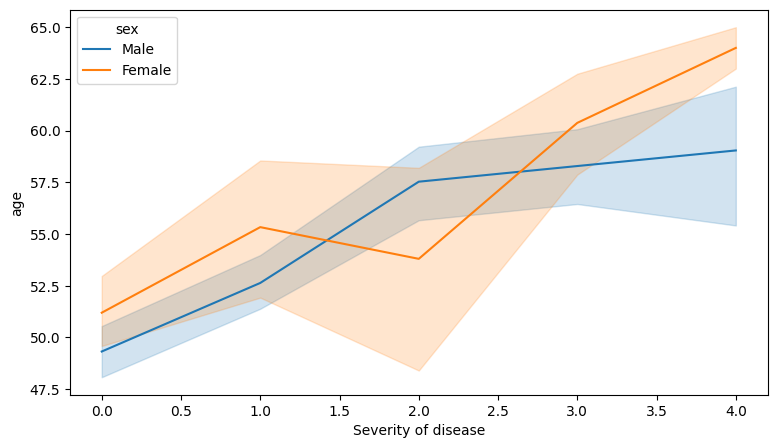

In [29]:
plt.figure(figsize=(9,5))
plt.xlabel("Severity of disease")
sns.lineplot(x="num", y="age", data=data, hue="sex")

#### Do men and women with heart disease tend to experience different types of chest pain?

In [30]:
female_with_disease = data[(data["has_disease"] == 1) & (data["sex"] == "Female")]
male_with_disease = data[(data["has_disease"] == 1) & (data["sex"] == "Male")]
print(female_with_disease.shape)
print(male_with_disease.shape)

(47, 18)
(364, 18)


| Value | Name                 | Meaning                                                                                                                                                | Typical Risk of Heart Disease                             |
| ----- | -------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------ | --------------------------------------------------------- |
| **1** | **Typical Angina**   | Classic chest pain caused by reduced blood flow to the heart (ischemia). Usually occurs with exertion or stress and relieved by rest or nitroglycerin. | **High**                                                  |
| **2** | **Atypical Angina**  | Chest discomfort that shares some features with angina but not all — may occur at rest or vary in character.                                           | **Moderate**                                              |
| **3** | **Non-anginal Pain** | Chest pain *not* related to heart muscle oxygen deprivation (e.g., due to anxiety, indigestion, or musculoskeletal causes).                            | **Low**                                                   |
| **4** | **Asymptomatic**     | No chest pain at all, but patient shows other signs of heart disease (like abnormal ECG or stress test results).                                       | **Often High** — especially in older or diabetic patients |


<Axes: xlabel='sex', ylabel='count'>

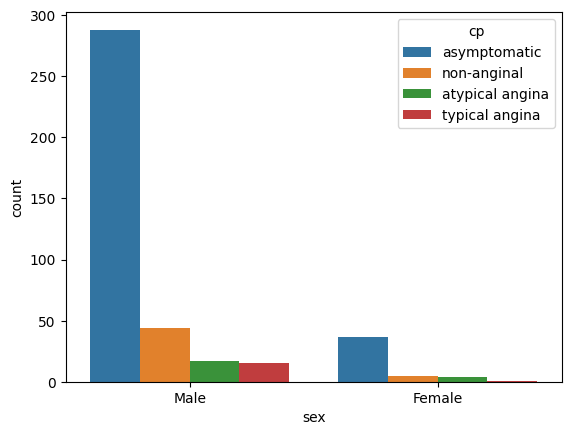

In [31]:
# Chest pain types of genders
sns.countplot(x="sex", hue="cp", data=has_disease)

<Axes: xlabel='cp', ylabel='age'>

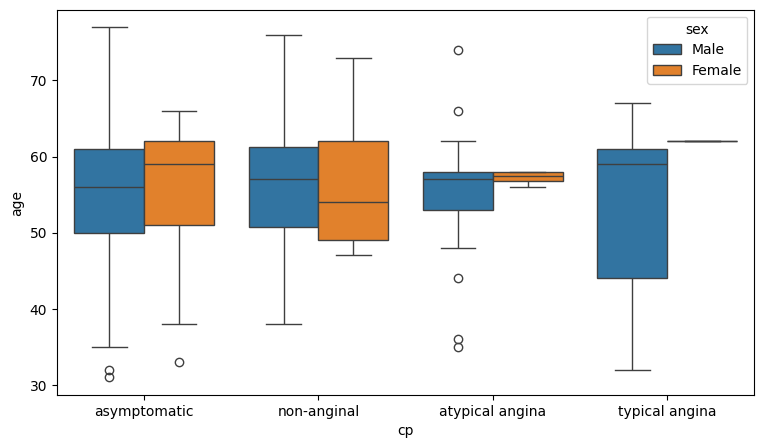

In [32]:
# Chest pain types of genders
plt.figure(figsize=(9,5))
sns.boxplot(x="cp", y="age", hue="sex", data=has_disease)

In [33]:
# Crosstab for heatmap
cp_gender = pd.crosstab(has_disease["cp"], has_disease["sex"])
cp_gender

sex,Female,Male
cp,,
asymptomatic,37,288
atypical angina,4,17
non-anginal,5,44
typical angina,1,15


Text(70.72222222222221, 0.5, 'Chest Pain Type')

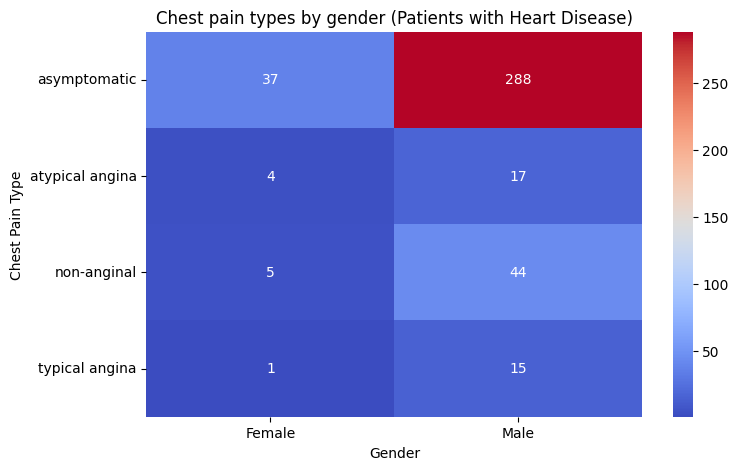

In [34]:
# Heatmap of chest pain types by gender
plt.figure(figsize=(8,5))
sns.heatmap(cp_gender, annot=True, fmt="d", cmap="coolwarm")
plt.title("Chest pain types by gender (Patients with Heart Disease)")
plt.xlabel("Gender")
plt.ylabel("Chest Pain Type")

# Daniel Tapia

# Which risk factors are most common in patients with heart disease?

In [45]:
data.describe()
#data.groupby('num').mean(numeric_only=True)



,id,age,trestbps,chol,thalch,oldpeak,ca,num,has_disease
count,754.000000,754.000000,751.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000
mean,409.285146,52.958886,131.866844,200.083554,140.946950,0.995623,-0.318302,0.984085,0.545093
std,254.615591,9.488913,18.592066,112.396624,24.727355,1.085542,1.016208,1.147669,0.498293
min,1.000000,28.000000,0.000000,-1.000000,60.000000,0.000000,-1.000000,0.000000,0.000000
25%,189.250000,46.000000,120.000000,175.000000,124.000000,0.000000,-1.000000,0.000000,0.000000
50%,388.000000,54.000000,130.000000,225.000000,142.000000,0.850000,-1.000000,1.000000,1.000000
75%,623.500000,60.000000,140.000000,269.000000,160.000000,1.700000,0.000000,2.000000,1.000000
max,916.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000,1.000000


<Axes: >

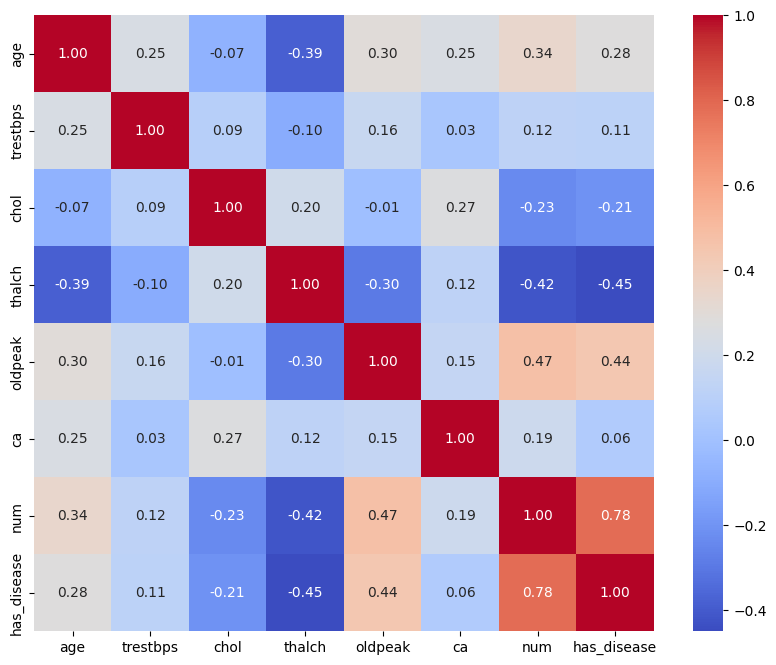

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
corr = data.select_dtypes(include='number').drop(columns=['id'], errors = 'ignore').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f" )
# sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')

Looks like thalch, age, oldpeak, chol, and ca have the most correlation to has_disease/num columns

In [58]:
#Let's see what features are significant

import scipy.stats as stats
import pandas as pd

numeric_cols = data.select_dtypes(include='number').columns

numeric_cols = [col for col in numeric_cols if col.lower() not in ['id']]

target = 'has_disease'

results = []

for col in numeric_cols:
    if col != target:
        x = data[col].dropna()
        y = data.loc[x.index, target]
        r, p = stats.pearsonr(x, y)
        results.append((col, r, p))

corr_data = pd.DataFrame(results, columns=['Feature', 'Correlation', 'p-value'])
corr_data.sort_values(by='Correlation', ascending= False, inplace = True)

corr_data

,Feature,Correlation,p-value
6,num,0.783845,8.931489e-158
4,oldpeak,0.442411,1.766781e-37
0,age,0.280559,4.183690e-15
1,trestbps,0.112557,2.006669e-03
5,ca,0.062477,8.645690e-02
2,chol,-0.208080,8.047859e-09
3,thalch,-0.448606,1.307943e-38


Thalch, Oldpeak, Age, Chol, and Trestbps are statistically significant their p-value is less than
0.5 and but CA is not statistaclly signifcant. 

# Raghav Vaid